In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from scipy.optimize import minimize

## Q.
- what $H_U$
- what f

In [7]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(-10),sigmoid(10)

(4.5397868702434395e-05, 0.9999546021312976)

In [8]:
def u(x, params):
    return x* params[0] + x**2 * params[1] #一旦これで定義した

bias = 0

In [17]:
def sigma(x, params, bias):
    return sigmoid(u(x, params) - bias)

In [18]:
def E_Pf(params, bias, approx_num = data_size):
    norm = np.random.normal(size = data_size)
    numerator = 0
    denominator = 0
    for i in range(approx_num):
        z = norm[i]
        numerator += np.exp(-z**2/2)/np.sqrt(2*np.pi) / z * sigma(z, params, bias)
        denominator += np.exp(-z**2/2)/np.sqrt(2*np.pi) / z
    return numerator/denominator

E_Pf([1,1], 1)

0.21219322365975513

# 実験１
### 汚染モデル
$$ Q = (1-\epsilon )N(0,1) +\epsilon N(5,1) $$


(array([  11.,  265., 2375., 4277., 1905.,  213.,  314.,  493.,  133.,
          14.]),
 array([-4.43602839, -3.13921863, -1.84240888, -0.54559913,  0.75121063,
         2.04802038,  3.34483013,  4.64163989,  5.93844964,  7.2352594 ,
         8.53206915]),
 <BarContainer object of 10 artists>)

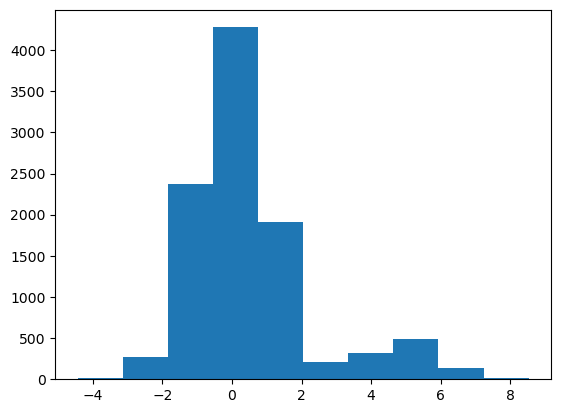

In [13]:
data_size = 10000
data_dim = 1
epsillon = 0.1
target_dist = np.random.normal(loc = 0, scale = 1, size = int(data_size*(1-epsillon)))
contaminated_dist = np.random.normal(loc = 5, scale=1, size = int(data_size*epsillon))
data = np.concatenate([target_dist, contaminated_dist])
data = data.astype(float)
plt.hist(data)

# Pseudo Code